In [1]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
sns.set_theme(style="ticks", palette="deep")

from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path
import ruamel.yaml as yaml
import torch

from soul_gan.datasets.utils import get_dataset, prepare_2d_gaussian_grid_data

from soul_gan.utils.general_utils import DotConfig, CONFIGS_DIR, DATA_DIR
from soul_gan.models.utils import load_gan

In [2]:
sample, modes = prepare_2d_gaussian_grid_data(int(5e3))
np.savez(Path(DATA_DIR, '25_gaussians_modes.npz').open('wb'), centroids=modes, closest_pts=modes, sigmas=np.ones(len(modes))*0.05)

In [3]:
dataset = get_dataset("gaussians_grid", int(5e3))
dataset[0]

tensor([-0.9799,  0.0656])

## Wasserstein GAN

In [4]:
xs = np.load(Path('../log/dumb_feature_DiscriminatorTarget/mlp_wass_0.01/images/0.npy'))

plt.scatter(xs[:, 0], xs[:, 1], alpha=0.1, s=20)
plt.axis('equal')
plt.grid()

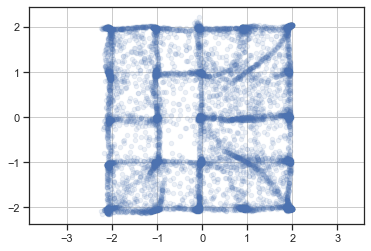

In [4]:
xs = np.load(Path('../log/cluster_feature_DiscriminatorTarget/mlp_wass_0.01/images/10000.npy'))

plt.scatter(xs[:, 0], xs[:, 1], alpha=0.1, s=20)
plt.axis('equal')
plt.grid()

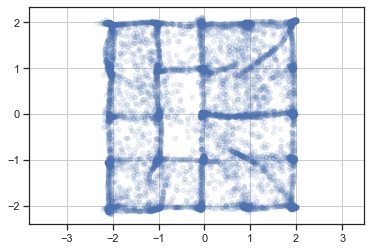

In [5]:
xs = np.load(Path('../log/dumb_feature_DiscriminatorTarget/mlp_wass_0.01/images/10000.npy'))

plt.scatter(xs[:, 0], xs[:, 1], alpha=0.1, s=20)
plt.axis('equal')
plt.grid()

In [6]:
device = torch.device(0)

config = DotConfig(yaml.round_trip_load(Path(CONFIGS_DIR, 'gan_configs/gauss2d-wass-mlp.yml').open('r'))).gan_config
gen, dis = load_gan(config, device, False)

In [7]:
n_pts_ax = 100
n_kde_pts = 50000
latent_grid = np.meshgrid(np.linspace(-3, 3, n_pts_ax), np.linspace(-3, 3, n_pts_ax))
real_grid = np.meshgrid(np.linspace(-2.5, 2.5, n_pts_ax), np.linspace(-2.5, 2.5, n_pts_ax))

zs = gen.prior.sample((n_kde_pts,))
xs_normalized = gen(zs)
xs = gen.inverse_transform(xs_normalized).detach().cpu().numpy()
dgz = dis(xs_normalized).squeeze().detach().cpu().numpy()

reals = torch.from_numpy(np.stack(real_grid, -1).reshape(-1, 2)).to(device).float()
dgz_ = dis(dis.transform(reals)).squeeze()

reals_np = reals.detach().cpu().numpy()

In [8]:
import scipy.stats as stats

kde = stats.kde.gaussian_kde(xs.transpose(1, 0))
log_probs = kde.logpdf(reals_np.transpose(1, 0))


Text(0.5, 1.0, '$-\\hat{E}(x) = \\log p_G(x) + d(x)$')

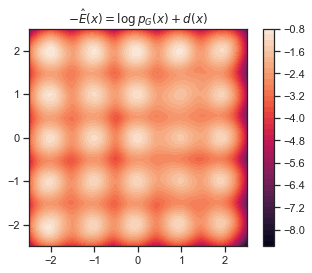

In [9]:
energy = (log_probs + dgz_.detach().cpu().numpy())
energy_grid = energy.reshape(n_pts_ax, n_pts_ax)
from  pathlib import Path
#Path('../figs/100gaussians').mkdir(exist_ok=True)

xs_grid = reals_np.reshape(n_pts_ax, n_pts_ax, 2)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.contourf(xs_grid[..., 0], xs_grid[..., 1], energy_grid, levels=50)
fig.colorbar(im)
ax.set_aspect('equal')
plt.title(r'$-\hat{E}(x) = \log p_G(x) + d(x)$')
#plt.savefig(Path('../figs/100gaussians', 'minus_energy_sigma_0.025.png'))

Text(0.5, 1.0, '$\\log p_G(x)$')

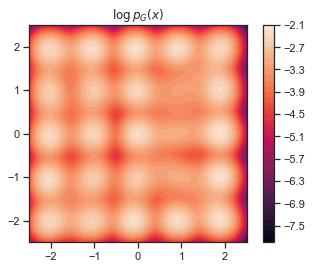

In [10]:

xs_grid = reals_np.reshape(n_pts_ax, n_pts_ax, 2)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.contourf(xs_grid[..., 0], xs_grid[..., 1], log_probs.reshape(n_pts_ax, n_pts_ax), levels=50)
fig.colorbar(im)
ax.set_aspect('equal')
plt.title(r'$\log p_G(x)$')
# plt.savefig(Path('../figs/100gaussians', 'log_prob_0.025.png'))

Text(0.5, 1.0, '$d(x)$')

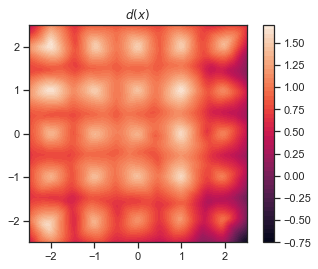

In [11]:

xs_grid = reals_np.reshape(n_pts_ax, n_pts_ax, 2)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.contourf(xs_grid[..., 0], xs_grid[..., 1], dgz_.detach().cpu().numpy().reshape(n_pts_ax, n_pts_ax), levels=50)
fig.colorbar(im)
ax.set_aspect('equal')
plt.title(r'$d(x)$')
# plt.savefig(Path('../figs/100gaussians', 'dgz_0.025.png'))

Text(0.5, 1.0, 'Points produced by Generator')

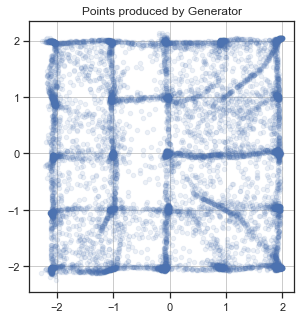

In [12]:
zs = gen.prior.sample((10000,))
xs_normalized = gen(zs)
xs = gen.inverse_transform(xs_normalized).detach().cpu().numpy()

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.scatter(xs[:, 0], xs[:, 1], s=20, alpha=0.1)
ax.set_aspect('equal')
plt.grid()
plt.title('Points produced by Generator')
# plt.savefig(Path('../figs/100gaussians', 'gen_0.025.png'))

## Jensen-Shannon GAN

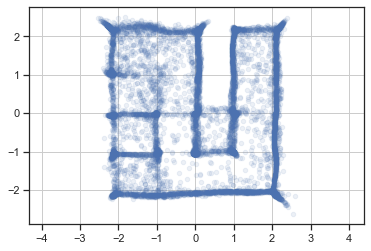

In [13]:
xs = np.load(Path('../log/dumb_feature_DiscriminatorTarget/mlp_js_0.01/images/0.npy'))

plt.scatter(xs[:, 0], xs[:, 1], alpha=0.1, s=20)
plt.axis('equal')
plt.grid()

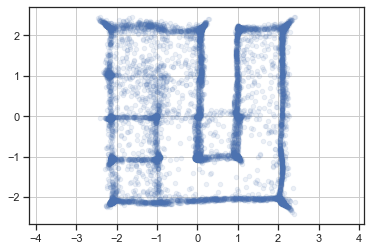

In [14]:
xs = np.load(Path('../log/cluster_feature_DiscriminatorTarget/mlp_js_0.01/images/10000.npy'))

plt.scatter(xs[:, 0], xs[:, 1], alpha=0.1, s=20)
plt.axis('equal')
plt.grid()

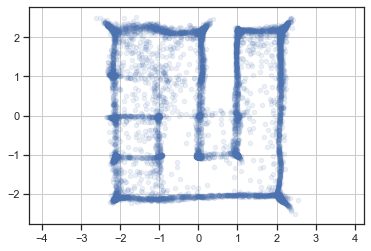

In [15]:
xs = np.load(Path('../log/dumb_feature_DiscriminatorTarget/mlp_js_0.01/images/10000.npy'))

plt.scatter(xs[:, 0], xs[:, 1], alpha=0.1, s=20)
plt.axis('equal')
plt.grid()